# Useful Scripts

## Location of the scripts

Here are some scripts that you may find useful. They are in the folder "./eppy/useful_scripts"

And now for some housekeeping before we start off

In [1]:
import os
os.chdir("../eppy/useful_scripts")
# changes directory, so we are where the scripts are located

In [2]:
# you would normaly install eppy by doing
# python setup.py install
# or
# pip install eppy
# or
# easy_install eppy

# if you have not done so, the following three lines are needed
import sys
# pathnameto_eppy = 'c:/eppy'
pathnameto_eppy = '../../'
sys.path.append(pathnameto_eppy) 


If you look in the folder "./eppy/useful_scripts", you fill find the following scripts

The scripts are:

    - eppy_version.py
    - idfdiff.py
    - loopdiagram.py
    - eppyreadtest_folder.py
    - eppyreadtest_file.py
        

## eppy_version.py

Many scripts will print out some help information, if you use the --help option. Let us try that

In [3]:
%%bash
# ignore the line above. It simply lets me run a command line from ipython notebook
python eppy_version.py --help

usage: eppy_version.py [-h]

I print the current version of eppy. Being polite, I also say hello !

optional arguments:
  -h, --help  show this help message and exit


That was useful !

Now let us try running the program

In [4]:
%%bash
# ignore the line above. It simply lets me run a command line from ipython notebook
python eppy_version.py

Hello! I am  eppy version 0.5.52


## Redirecting output to a file

Most scripts will print the output to a terminal. Sometimes we want to send the output to a file, so that we can save it for posterity. We can do that py using ">" with the filename after that. For eppy_version.py, it will look like this:

Some of the following scripts will generate csv or html outputs. We can direct the output to a file with .html extension and open it in a browser

## Compare two idf files - idfdiff.py

This script will compare two idf files. The results will be displayed printed in "csv" format or in "html" format. 

You would run the script from the command line. This would be the terminal on Mac or unix, and the dos prompt on windows. Let us look at the help for this script, by typing:


In [8]:
%%bash
# ignore the line above. It simply lets me run a command line from ipython notebook
python idfdiff.py -h

usage: idfdiff.py [-h] [--idd IDD] (--csv | --html) file1 file2

Do a diff between two idf files. Prints the diff in csv or html file format.
You can redirect the output to a file and open the file using as a spreadsheet
or by using a browser

positional arguments:
  file1       location of first with idf files = ./somewhere/f1.idf
  file2       location of second with idf files = ./somewhere/f2.idf

optional arguments:
  -h, --help  show this help message and exit
  --idd IDD   location of idd file = ./somewhere/eplusv8-0-1.idd
  --csv
  --html


Now let us try this with two "idf" files that are slightly different. If we open them in a file comparing software, it would look like this:

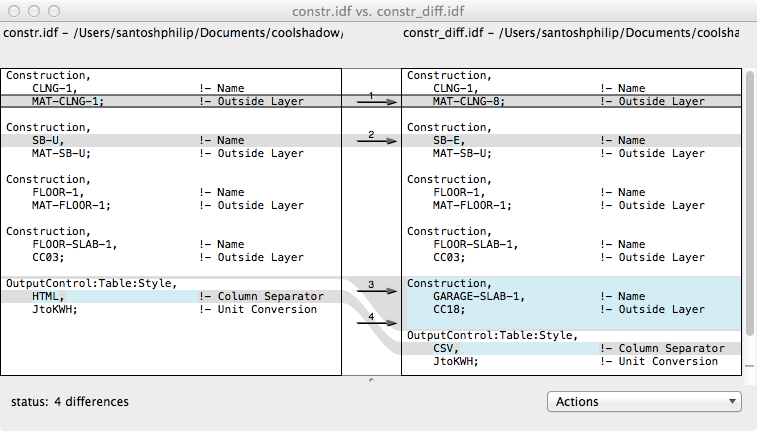

In [9]:
from eppy.useful_scripts import doc_images #no need to know this code, it just shows the image below
for_images = doc_images
for_images.display_png(for_images.filemerge) # display the image below

There are 4 differences between the files. Let us see what idfdiff.py does with the two files. We will use the --html option to print out the diff in html format.

In [11]:
%%bash
# python idfdiff.py idd file1 file2
python idfdiff.py --html --idd ../resources/iddfiles/Energy+V7_2_0.idd ../resources/idffiles/V_7_2/constructions.idf ../resources/idffiles/V_7_2/constructions_diff.idf 

../resources/iddfiles/Energy+V7_2_0.idd ../resources/idffiles/V_7_2/constructions.idf ../resources/idffiles/V_7_2/constructions_diff.idf
<html><p>file1 = ../resources/idffiles/V_7_2/constructions.idf</p><p>file2 = ../resources/idffiles/V_7_2/constructions_diff.idf</p><table border="1"><tr><th>Object Key</th><th> Object Name</th><th> Field Name</th><th> file1</th><th> file2</th></tr><tr><td>MATERIAL</td><td>F08 Metal surface</td><td></td><td>is here</td><td>not here</td></tr><tr><td>MATERIAL</td><td>F08 Metal surface haha</td><td></td><td>not here</td><td>is here</td></tr><tr><td>MATERIAL</td><td>G05 25mm wood</td><td>Conductivity</td><td>0.15</td><td>0.155</td></tr><tr><td>CONSTRUCTION</td><td>Exterior Door</td><td>Outside Layer</td><td>F08 Metal surface</td><td>F08 Metal surface haha</td></tr></table></html>


idfdiff.py:193: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file idfdiff.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup()


It does look like html :-). We need to redirect this output to a file and then open the file  in a browser to see what it looks like. Displayed below is the html file

In [12]:
from eppy.useful_scripts import doc_images #no need to know this code, it just shows the image below
from IPython.display import HTML
h = HTML(open(doc_images.idfdiff_path, 'r').read())
h

Object Key,Object Name,Field Name,file1,file2
CONSTRUCTION,CLNG-1,Outside Layer,MAT-CLNG-1,MAT-CLNG-8
CONSTRUCTION,GARAGE-SLAB-1,,is here,not here
CONSTRUCTION,SB-E,,is here,not here
CONSTRUCTION,SB-U,,not here,is here
OUTPUTCONTROL:TABLE:STYLE,,Column Separator,HTML,CSV


Pretty straight forward. Scroll up and look at the origin text files, and see how idfdiff.py understands the difference

Now let us try the same thin in csv format

In [14]:
%%bash
# python idfdiff.py idd file1 file2
python idfdiff.py --csv --idd ../resources/iddfiles/Energy+V7_2_0.idd ../resources/idffiles/V_7_2/constr.idf ../resources/idffiles/V_7_2/constr_diff.idf

../resources/iddfiles/Energy+V7_2_0.idd ../resources/idffiles/V_7_2/constr.idf ../resources/idffiles/V_7_2/constr_diff.idf
file1 = ../resources/idffiles/V_7_2/constr.idf
file2 = ../resources/idffiles/V_7_2/constr_diff.idf

Object Key, Object Name, Field Name, file1, file2
CONSTRUCTION,CLNG-1,Outside Layer,MAT-CLNG-1,MAT-CLNG-8
CONSTRUCTION,GARAGE-SLAB-1,,not here,is here
CONSTRUCTION,SB-E,,not here,is here
CONSTRUCTION,SB-U,,is here,not here
OUTPUTCONTROL:TABLE:STYLE, ,Column Separator,HTML,CSV


We see the same output, but now in csv format. You can redirect it to a ".csv" file and open it up as a spreadsheet

## loopdiagram.py

### Diagrams of HVAC loops

This script will draw all the loops in an idf file. It is a bit of a hack. So it will work on most files, but sometimes it will not :-(. But it is pretty useful when it works. 

If it does not work, send us the idf file and we'll try to fix the code

Make sure [grapphviz](http://www.research.att.com/sw/tools/graphviz/) is installed for this script to work

Again, we'll have to run the script from the terminal. Let us look at the help for this script

In [15]:
%%bash
# ignore the line above. It simply lets me run a command line from ipython notebook
python loopdiagram.py --help

Couldn't import dot_parser, loading of dot files will not be possible.
usage: loopdiagram.py [-h] idd file

Draw all the  loops in the IDF file.

There are two output files saved in the same location as the idf file:
- idf_file_location/idf_filename.dot
- idf_file_location/idf_filename.png

positional arguments:
  idd         location of idd file = ./somewhere/eplusv8-0-1.idd
  file        location of idf file = ./somewhere/f1.idf

optional arguments:
  -h, --help  show this help message and exit


Pretty straightforward. Simply open png file and you will see the loop diagram. (ignore the dot file for now. it will be documented later)

So let us try this out with and simple example file. We have a very simple plant loop in "../resources/idffiles/V_7_2/plantloop.idf"

In [16]:
%%bash
# ignore the line above. It simply lets me run a command line from ipython notebook
python loopdiagram.py ../resources/iddfiles/Energy+V7_2_0.idd ../resources/idffiles/V_7_2/plantloop.idf

Couldn't import dot_parser, loading of dot files will not be possible.
constructing the loops
cleaning edges
making the diagram
saved file: ../resources/idffiles/V_7_2/plantloop.dot
saved file: ../resources/idffiles/V_7_2/plantloop.png


The script prints out it's progress. On larger files, this might take a few seconds. If we open this file, it will look like the diagram below

*Note: the supply and demnd sides are not connected in the diagram, but shown seperately for clarity*

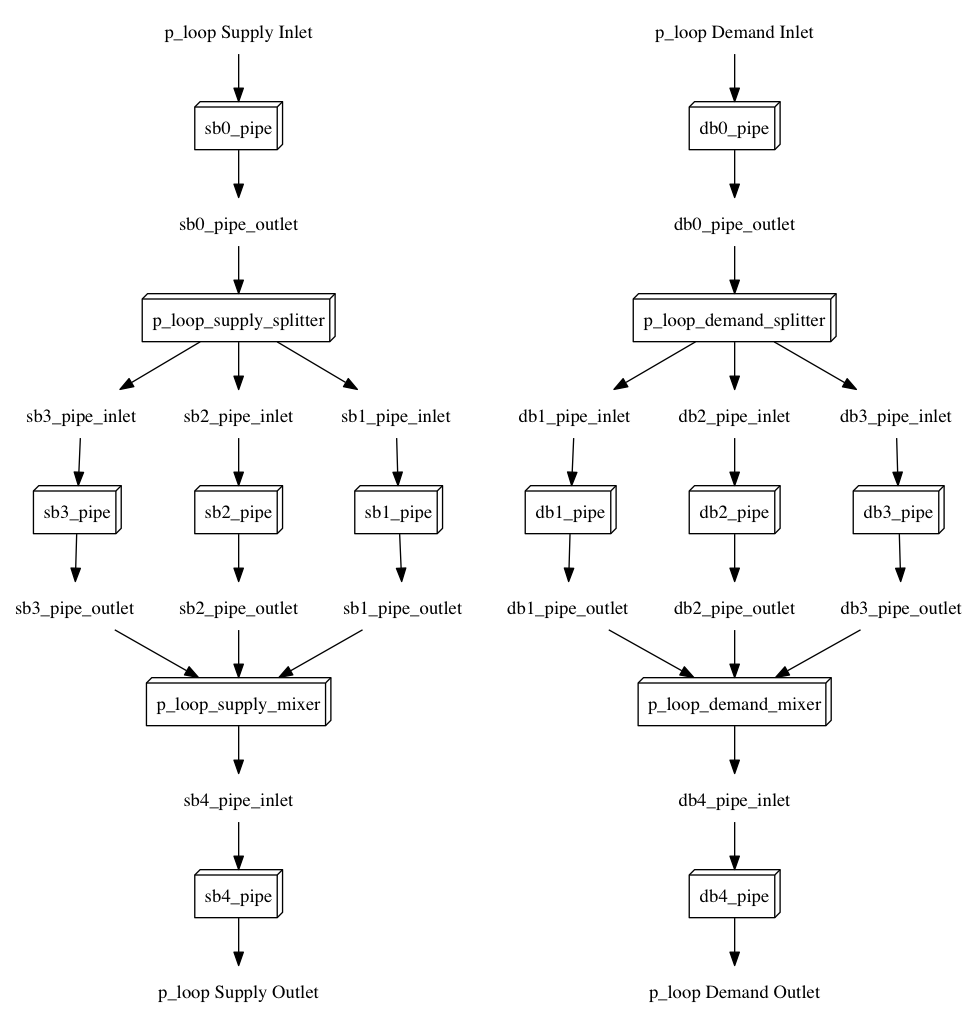

In [17]:
from eppy.useful_scripts import doc_images #no need to know this code, it just shows the image below
for_images = doc_images
for_images.display_png(for_images.plantloop) # display the image below

That diagram is not a real system. Does this script really work ?

Try it yourself. Draw the daigram for "../resources/idffiles/V_7_2/5ZoneCAVtoVAVWarmestTempFlow.idf"

### Names in loopdiagrams

- [Designbuilder](http://www.designbuilder.co.uk) is an energyplus editor autogenerates object names like "MyHouse:SAPZone1"
- Note the ":" in the name.
- Unfortunatley ":" is a reserved character when making a loop diagrams. (eppy uses pydot and grapphviz which has this constraint)
- to work around this, loopdiagram will replace all ":" with a "__"
- So the names in the diagram will not match the names in your file, but you can make out what is going on

## eppyreadtest_folder.py

Not yet documented

## eppyreadtest_file.py

Not yet documented